In [1]:
import findspark
findspark.init()

In [2]:
#Tugas 1
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("David", 20, "UI/UX Designer", "Sepak Bola", "L"), ("Ali", 34, "Web Developer", "Mancing", "L"), ("Budi", 23, "Data Analist", "Editing Video", "L"), ("Citra", 29, "Dosen", "Fotografi", "P"), ("Dina", 45, "Wirausaha", "Membaca", "P")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-----+----+--------------+-------------+------+
| Nama|Usia|     Pekerjaan|         Hobi|Gender|
+-----+----+--------------+-------------+------+
|David|  20|UI/UX Designer|   Sepak Bola|     L|
|  Ali|  34| Web Developer|      Mancing|     L|
| Budi|  23|  Data Analist|Editing Video|     L|
|Citra|  29|         Dosen|    Fotografi|     P|
| Dina|  45|     Wirausaha|      Membaca|     P|
+-----+----+--------------+-------------+------+



In [3]:
#Tugas 2
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("David", 20, "UI/UX Designer", "Sepak Bola", "L"), ("Ali", 34, "Web Developer", "Mancing", "L"), ("Budi", 23, "Data Analist", "Editing Video", "L"), ("Citra", 29, "Dosen", "Fotografi", "P"), ("Dina", 45, "Wirausaha", "Membaca", "P")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
print("Menampilkan DataFrame")
df.show()

# Filtering data
print("Filtering data")
df_filtered = df.filter(df['Usia'] < 28)
df_filtered.show()

# Menghitung rata-rata usia
print("Menghitung rata-rata usia")
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan nama
print("Mengurutkan data berdasarkan nama")
df_sorted = df.orderBy("Nama", descending=False)
df_sorted.show()

Menampilkan DataFrame
+-----+----+--------------+-------------+------+
| Nama|Usia|     Pekerjaan|         Hobi|Gender|
+-----+----+--------------+-------------+------+
|David|  20|UI/UX Designer|   Sepak Bola|     L|
|  Ali|  34| Web Developer|      Mancing|     L|
| Budi|  23|  Data Analist|Editing Video|     L|
|Citra|  29|         Dosen|    Fotografi|     P|
| Dina|  45|     Wirausaha|      Membaca|     P|
+-----+----+--------------+-------------+------+

Filtering data
+-----+----+--------------+-------------+------+
| Nama|Usia|     Pekerjaan|         Hobi|Gender|
+-----+----+--------------+-------------+------+
|David|  20|UI/UX Designer|   Sepak Bola|     L|
| Budi|  23|  Data Analist|Editing Video|     L|
+-----+----+--------------+-------------+------+

Menghitung rata-rata usia
+---------+
|avg(Usia)|
+---------+
|     30.2|
+---------+

Mengurutkan data berdasarkan nama
+-----+----+--------------+-------------+------+
| Nama|Usia|     Pekerjaan|         Hobi|Gender|
+-----+

In [4]:
#Tugas 3
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["David", "Ali", "Budi", "Citra", "Dina"], "Usia": [20, 34, 23, 29, 45], "Asal Kota": ["Purworejo", "Magelang", "Bandung", "Yogyakarta", "Tangerang"]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas 
print(df_pandas)
print()

print("Filtering data berdasarkan usia:")
# Filtering data berdasarkan usia  
df_filter = df_pandas[df_pandas["Usia"] >= 29]  

# Menampilkan DataFrame yang telah difilter  
df_filter = pd.DataFrame(df_filter)
df_filter

    Nama  Usia   Asal Kota
0  David    20   Purworejo
1    Ali    34    Magelang
2   Budi    23     Bandung
3  Citra    29  Yogyakarta
4   Dina    45   Tangerang

Filtering data berdasarkan usia:


,Nama,Usia,Asal Kota
1,Ali,34,Magelang
3,Citra,29,Yogyakarta
4,Dina,45,Tangerang


    Nama  Usia       Pekerjaan
0  David    20  UI/UX Designer
1    Ali    34   Web Developer
2   Budi    23    Data Analist
3  Citra    29           Dosen
4   Dina    45       Wirausaha
            Usia
count   5.000000
mean   30.200000
std     9.884331
min    20.000000
25%    23.000000
50%    29.000000
75%    34.000000
max    45.000000


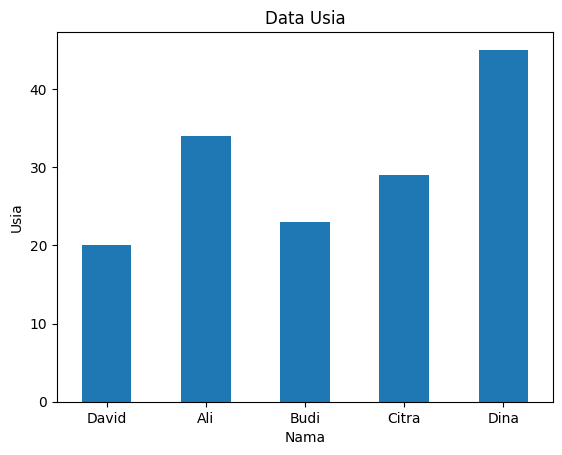

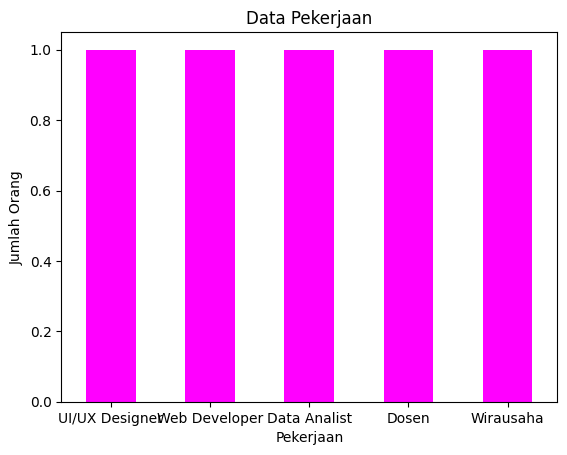

In [29]:
#Tugas 4
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["David", "Ali", "Budi", "Citra", "Dina"], "Usia": [20, 34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["David", "Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["UI/UX Designer", "Web Developer", "Data Analist", "Dosen", "Wirausaha"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

data_pekerjaan= df_joined['Pekerjaan'].value_counts()

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data usia
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.title('Data Usia')
plt.xlabel('Nama')
plt.ylabel('Usia')
plt.xticks(ticks=range(len(df_pandas)), labels=df_pandas['Nama'], rotation=0)
plt.show()

#Plotting data pekerjaan
data_pekerjaan.plot(kind='bar', color='magenta')
plt.title('Data Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Orang')
plt.xticks(rotation=0)
plt.show()

In [45]:
#Tugas 5

# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_spark_from_pandas.show()
print(df_pandas_from_spark)

#Menggagubangkan DataFrame
df_combined_pandas = pd.merge(df_pandas_from_spark, df_pandas, on="Nama", how="left")

df_combined_spark = spark.createDataFrame(df_combined_pandas)

#Menampilkan data gabungan
print()
print("Gabungan data dari pandas dan spark:")
df_combined_spark.show()

#Menghitung rata-rata usia
avg_usia = df_pandas_from_spark['Usia'].mean()
print(f"Rata-rata usia: {avg_usia}")


+-----+----+
| Nama|Usia|
+-----+----+
|David|  20|
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

    Nama  Usia       Pekerjaan           Hobi Gender
0  David    20  UI/UX Designer     Sepak Bola      L
1    Ali    34   Web Developer        Mancing      L
2   Budi    23    Data Analist  Editing Video      L
3  Citra    29           Dosen      Fotografi      P
4   Dina    45       Wirausaha        Membaca      P

Gabungan data dari pandas dan spark:
+-----+------+--------------+-------------+------+------+
| Nama|Usia_x|     Pekerjaan|         Hobi|Gender|Usia_y|
+-----+------+--------------+-------------+------+------+
|David|    20|UI/UX Designer|   Sepak Bola|     L|    20|
|  Ali|    34| Web Developer|      Mancing|     L|    34|
| Budi|    23|  Data Analist|Editing Video|     L|    23|
|Citra|    29|         Dosen|    Fotografi|     P|    29|
| Dina|    45|     Wirausaha|      Membaca|     P|    45|
+-----+------+--------------+-------------+------+------+

Rat

In [46]:
#Tugas 6

# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_spark_from_pandas.show()
print(df_pandas_from_spark)

#Menggagubangkan DataFrame
df_combined_pandas = pd.merge(df_pandas_from_spark, df_pandas, on="Nama", how="left")

df_combined_spark = spark.createDataFrame(df_combined_pandas)

#Menampilkan data gabungan
print()
print("Gabungan data dari pandas dan spark:")
df_combined_spark.show()

# Menghitung nilai maksimum dari kolom "Usia"
max_usia = df_pandas_from_spark["Usia"].max()
print(f"Nilai maksimum usia di Pandas: {max_usia}")


+-----+----+
| Nama|Usia|
+-----+----+
|David|  20|
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

    Nama  Usia       Pekerjaan           Hobi Gender
0  David    20  UI/UX Designer     Sepak Bola      L
1    Ali    34   Web Developer        Mancing      L
2   Budi    23    Data Analist  Editing Video      L
3  Citra    29           Dosen      Fotografi      P
4   Dina    45       Wirausaha        Membaca      P

Gabungan data dari pandas dan spark:
+-----+------+--------------+-------------+------+------+
| Nama|Usia_x|     Pekerjaan|         Hobi|Gender|Usia_y|
+-----+------+--------------+-------------+------+------+
|David|    20|UI/UX Designer|   Sepak Bola|     L|    20|
|  Ali|    34| Web Developer|      Mancing|     L|    34|
| Budi|    23|  Data Analist|Editing Video|     L|    23|
|Citra|    29|         Dosen|    Fotografi|     P|    29|
| Dina|    45|     Wirausaha|      Membaca|     P|    45|
+-----+------+--------------+-------------+------+------+

Nil